In [19]:
# dataset @ https://finance.yahoo.com/quote/TSLA/history

In [20]:
import pandas as pd

df = pd.read_csv('Stocks Dataset/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3347,2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
3348,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
3349,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800
3350,2023-10-19,225.949997,230.610001,216.779999,220.110001,220.110001,170772700


In [21]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3347,2023-10-16,253.919998
3348,2023-10-17,254.850006
3349,2023-10-18,242.679993
3350,2023-10-19,220.110001


In [22]:
df['Date']

0       2010-06-29
1       2010-06-30
2       2010-07-01
3       2010-07-02
4       2010-07-06
           ...    
3347    2023-10-16
3348    2023-10-17
3349    2023-10-18
3350    2023-10-19
3351    2023-10-20
Name: Date, Length: 3352, dtype: object

In [23]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


In [24]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\ACER\AppData\Local\Temp\ipykernel_29492\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3347   2023-10-16
3348   2023-10-17
3349   2023-10-18
3350   2023-10-19
3351   2023-10-20
Name: Date, Length: 3352, dtype: datetime64[ns]

In [25]:

fdates = pd.DataFrame({'Date' : pd.date_range(df["Date"].max() + pd.DateOffset(days=1), df["Date"].max() + pd.DateOffset(days=4))})
fdates['Close'] = None

df_new = pd.concat([df,fdates], ignore_index = True)

df_new

C:\Users\ACER\AppData\Local\Temp\ipykernel_29492\4220056989.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_new = pd.concat([df,fdates], ignore_index = True)


,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3351,2023-10-20,211.990005
3352,2023-10-21,NaN
3353,2023-10-22,NaN
3354,2023-10-23,NaN


In [26]:
df_new.index = df_new.pop('Date')
df_new

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2023-10-20,211.990005
2023-10-21,NaN
2023-10-22,NaN


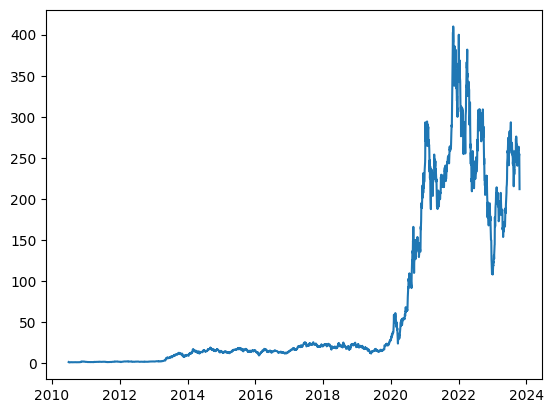

In [27]:
import matplotlib.pyplot as plt

plt.plot(df_new.index, df_new['Close'])

In [28]:
import numpy as np
import datetime

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df_new, 
                                '2020-02-25', 
                                '2023-02-24', 
                                n=5)

windowed_df

,Target Date,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2020-02-25,57.226665,61.161331,59.960667,60.066666,55.585999,53.327332
1,2020-02-26,61.161331,59.960667,60.066666,55.585999,53.327332,51.919998
2,2020-02-27,59.960667,60.066666,55.585999,53.327332,51.919998,45.266666
3,2020-02-28,60.066666,55.585999,53.327332,51.919998,45.266666,44.532665
4,2020-03-02,55.585999,53.327332,51.919998,45.266666,44.532665,49.574669
...,...,...,...,...,...,...,...
752,2023-02-17,196.889999,194.639999,209.250000,214.240005,202.039993,208.309998
753,2023-02-21,194.639999,209.250000,214.240005,202.039993,208.309998,197.369995
754,2023-02-22,209.250000,214.240005,202.039993,208.309998,197.369995,200.860001
755,2023-02-23,214.240005,202.039993,208.309998,197.369995,200.860001,202.070007


In [29]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
data = windowed_df.iloc[:, 1:7]
scaled_df = sc.fit_transform(data)

print(scaled_df)


[[0.08589351 0.09608989 0.09297846 0.09325315 0.08164185 0.0757887 ]
 [0.09608989 0.09297846 0.09325315 0.08164185 0.0757887  0.0721417 ]
 [0.09297846 0.09325315 0.08164185 0.0757887  0.0721417  0.05490012]
 ...
 [0.47984997 0.49278118 0.46116581 0.47741403 0.44906388 0.45810795]
 [0.49278118 0.46116581 0.47741403 0.44906388 0.45810795 0.46124359]
 [0.46116581 0.47741403 0.44906388 0.45810795 0.46124359 0.44779411]]


In [30]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(data)

dates.shape, X.shape, y.shape

((757,), (757, 4, 1), (757,))

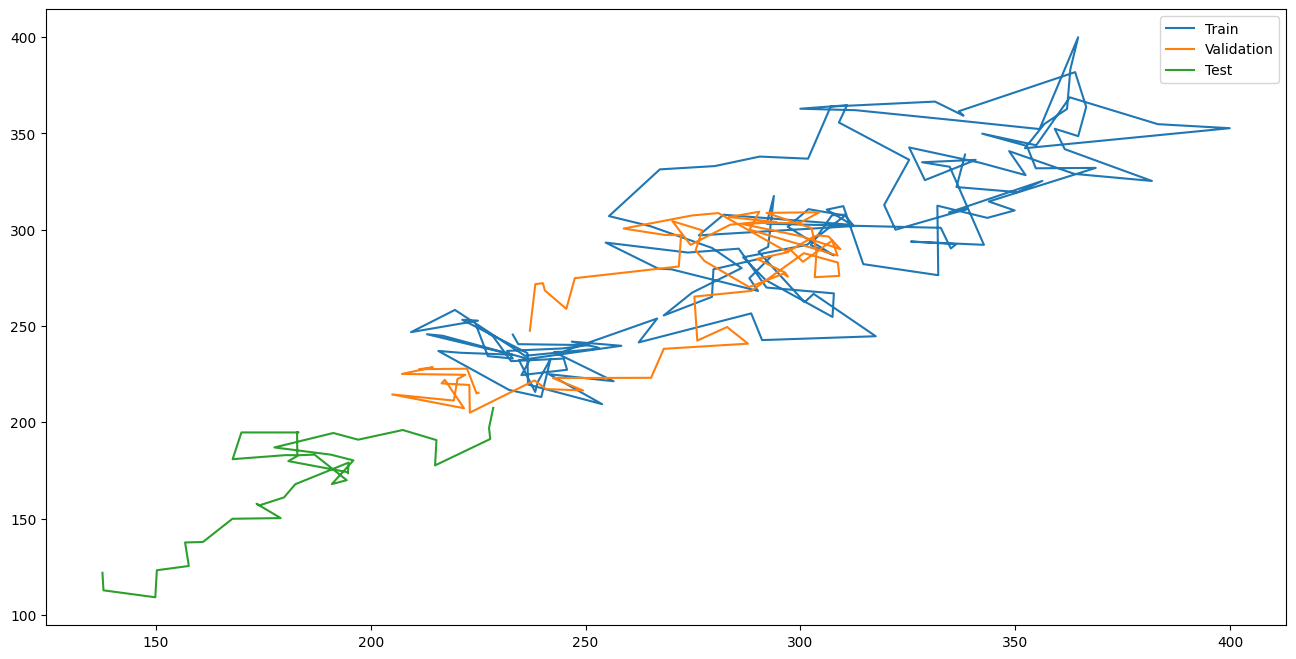

In [31]:

q_60 = int(len(dates) * .6)
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)
q_95 = int(len(dates) * .95)


dates_train, X_train, y_train = dates[q_60:q_80], X[q_60:q_80], y[q_60:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:q_95], X[q_90:q_95], y[q_90:q_95]

# plt.xticks(fontsize = 5)
plt.figure(figsize=(16,8))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test', 'Pred'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import tensorflow as tf

opt_1 = Adam(learning_rate=0.0001)
opt_2 = 'sgd'

model = Sequential([layers.Input((4, 1)),
                    layers.LSTM(512),
                    layers.Dense(256, activation='relu'),
                    layers.Dense(256, activation='relu'),
                    layers.Dense(1)])

print(tf.size(X_train))
model.summary()

model.compile(loss='mse', 
              optimizer=opt_1,
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 50, use_multiprocessing = True, epochs=150)

In [33]:
model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 50, use_multiprocessing = True, epochs= 100)

Epoch 1/100
4/4 [==============================] - 0s 63ms/step - loss: 167.2592 - accuracy: 0.0000e+00 - val_loss: 99.5701 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 49ms/step - loss: 170.0254 - accuracy: 0.0000e+00 - val_loss: 97.1489 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 56ms/step - loss: 168.1307 - accuracy: 0.0000e+00 - val_loss: 95.6549 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 61ms/step - loss: 167.1857 - accuracy: 0.0000e+00 - val_loss: 94.7645 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 68ms/step - loss: 166.3313 - accuracy: 0.0000e+00 - val_loss: 93.8923 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 60ms/step - loss: 165.8888 - accuracy: 0.0000e+00 - val_loss: 93.4366 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 60ms/step - loss: 166.7696 - accuracy: 0

5/5 [==============================] - 1s 9ms/step


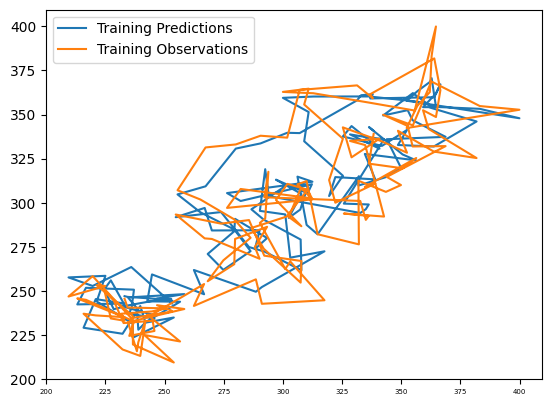

In [34]:
train_predictions = model.predict(X_train).flatten()

plt.xticks(fontsize=5)
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)


plt.legend(['Training Predictions', 'Training Observations'])

3/3 [==============================] - 0s 10ms/step


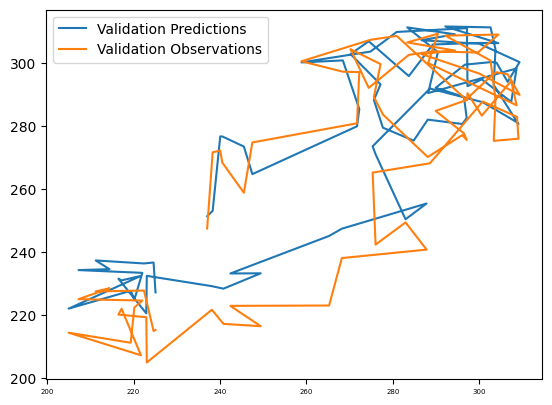

In [35]:
val_predictions = model.predict(X_val).flatten()

plt.xticks(fontsize=5)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 9ms/step


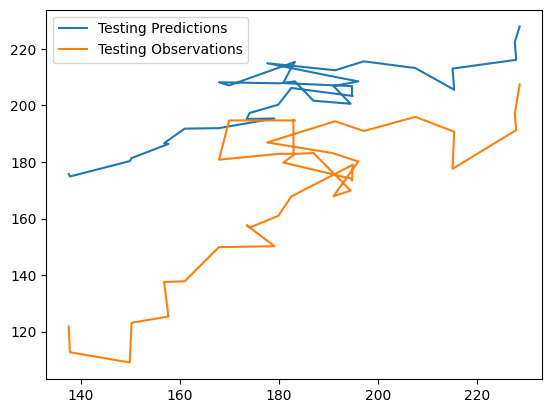

In [36]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

NameError: name 'dates_pred' is not defined

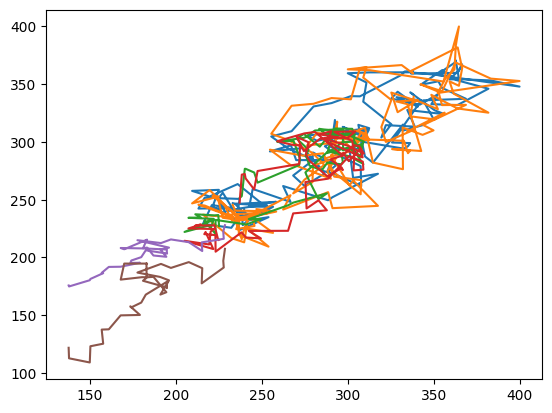

In [37]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(dates_pred, y_pred)

plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Extrapolate'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])